<a href="https://colab.research.google.com/github/antiantono/bts-dsf-anti/blob/main/assignments/S5S6_Exercise_AA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Assignement Session 5 and 6

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-11-12)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/antiantono/bts-dsf-anti/blob/main/assignments/S5S6_Exercise_AA.ipynb#scrollTo=9cbq2uxzPURW)

# EXERCISE 1: image filtering

From the datasets (images) available from [skimage data](https://scikit-image.org/docs/dev/api/skimage.data.html), choose an **RGB** image and do the following:

* Crop the image
* Smoothen the image with a kernel filter.
* Sharpen the image with a kernel filter
* Find the edges of the image with at least two different methods.
* From the processes above, save the image that you prefer as a .jpg

### Import image

In [ ]:
# Libraries & functionalities
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Image shape:  (300, 451, 3)


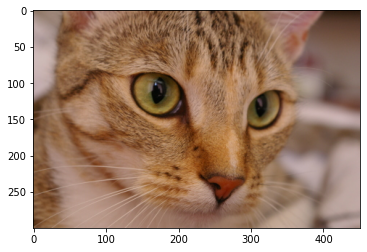

In [ ]:
# Import RGB image : Chelsea the cat
from skimage.data import chelsea
chelsea = chelsea()   
print("Image shape: ",chelsea.shape)

plt.imshow(chelsea)

## Crop image

(-0.5, 274.5, 129.5, -0.5)

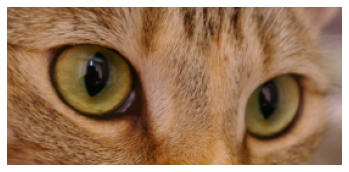

In [ ]:
plt.imshow(chelsea[55:185,100:375])
plt.axis('off')

## Smoothen with kernel filter

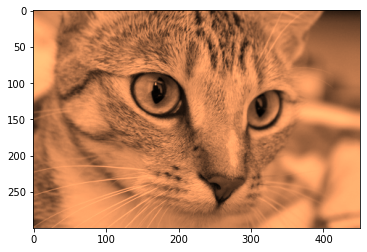

In [ ]:
# Convert Chelsea to grayscale
from skimage.color import rgb2gray
chelsea_gray = rgb2gray(chelsea)

plt.imshow(chelsea_gray,cmap='copper')

In [ ]:
# Function to create custom Gaussian kernel 
def fspecial_gauss(size, sigma):
    """
    Function to mimic the 'fspecial' gaussian MATLAB function
    Copied from https://stackoverflow.com/questions/17190649/how-to-obtain-a-gaussian-filter-in-python
    """
    x, y = np.mgrid[-size//2 + 1:size//2 + 1, -size//2 + 1:size//2 + 1]
    g = np.exp(-((x**2 + y**2)/(2.0*sigma**2)))
    return g/g.sum()

Gaussian kernel 
 [[0.0317564  0.03751576 0.03965895 0.03751576 0.0317564 ]
 [0.03751576 0.04431963 0.04685151 0.04431963 0.03751576]
 [0.03965895 0.04685151 0.04952803 0.04685151 0.03965895]
 [0.03751576 0.04431963 0.04685151 0.04431963 0.03751576]
 [0.0317564  0.03751576 0.03965895 0.03751576 0.0317564 ]]


Text(0.5, 1.0, 'Original')

Text(0.5, 1.0, 'Gaussian blur')

(-0.5, 450.5, 299.5, -0.5)

(-0.5, 450.5, 299.5, -0.5)

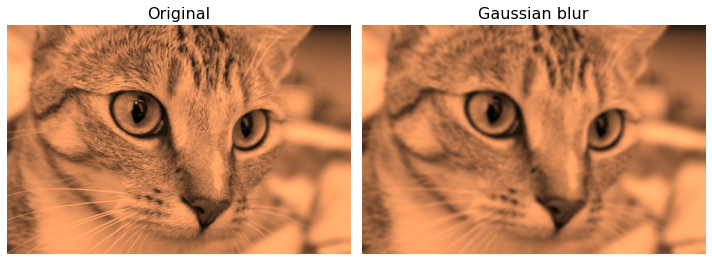

In [ ]:
from scipy import ndimage

# Create Gaussian kernel
k_gauss = fspecial_gauss(5,3)
print("Gaussian kernel","\n",k_gauss)

# Blur image and plot
chelsea_gblur = ndimage.convolve(chelsea_gray, k_gauss, mode='nearest', cval=1.0)

fig, ax = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(10,6))

ax[0].imshow(chelsea_gray, cmap='copper')
ax[0].set_title('Original', fontsize = 16)

ax[1].imshow(chelsea_gblur, cmap='copper')
ax[1].set_title('Gaussian blur', fontsize = 16)

for a in ax:
  a.axis('off')

plt.tight_layout()
plt.show()

## Sharpen the image with a kernel filter

Text(0.5, 1.0, 'Original')

Text(0.5, 1.0, 'Gaussian blur')

Text(0.5, 1.0, 'Original sharpened')

Text(0.5, 1.0, 'Blur sharpened')

(array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33ddf55f60>,
       dtype=object), (-0.5, 450.5, 299.5, -0.5))

(array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33ddf55f60>,
       dtype=object), (-0.5, 450.5, 299.5, -0.5))

(array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33ddeb1eb8>,
       dtype=object), (-0.5, 450.5, 299.5, -0.5))

(array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33ddeb1eb8>,
       dtype=object), (-0.5, 450.5, 299.5, -0.5))

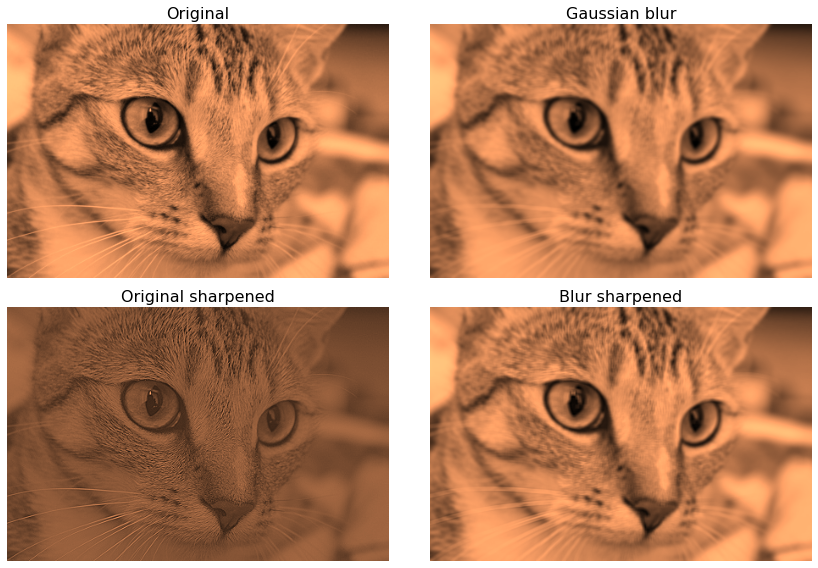

In [ ]:
from scipy import ndimage

# Sharpening kernel
k_sharp = np.array([[0,-1,0],
                    [-1,5,-1],
                    [0,-1,0]])

# Sharpen image and plot
chelsea_sharp = ndimage.convolve(chelsea_gray, k_sharp, mode='nearest', cval=1.0)
chelsea_blur_sharp = ndimage.convolve(chelsea_gblur, k_sharp, mode='nearest', cval=1.0)

fig, ax = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True, figsize=(12,8))

ax[0,0].imshow(chelsea_gray, cmap='copper')
ax[0,0].set_title('Original', fontsize = 16)

ax[0,1].imshow(chelsea_gblur, cmap='copper')
ax[0,1].set_title('Gaussian blur', fontsize = 16)

ax[1,0].imshow(chelsea_sharp, cmap='copper')
ax[1,0].set_title('Original sharpened', fontsize = 16)

ax[1,1].imshow(chelsea_blur_sharp, cmap='copper')
ax[1,1].set_title('Blur sharpened', fontsize = 16)

for i in ax:
  for j in i:
    i,j.axis('off')

plt.tight_layout()
plt.show()

## Find edges with kernel

Text(0.5, 1.0, 'Gaussian blur')

Text(0.5, 1.0, 'Blur with edge filter')

Text(0.5, 1.0, 'Blur with high-pass filter')

(-0.5, 450.5, 299.5, -0.5)

(-0.5, 450.5, 299.5, -0.5)

(-0.5, 450.5, 299.5, -0.5)

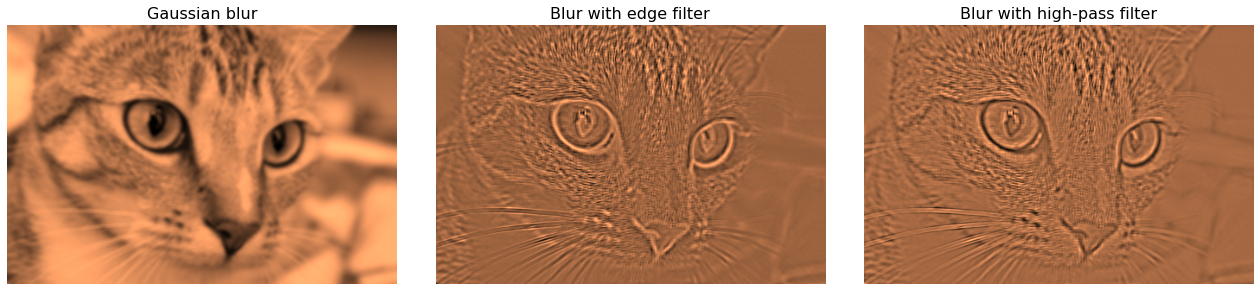

In [ ]:
from scipy import ndimage

# Edge detection filter
k_edge = np.array([[0,1,0],
                   [1,-4,1],
                   [0,1,0]])

# High pass filter
k_high = np.array([[-1,-1,-1],
                   [-1,8,-1],
                   [-1,-1,-1]])


# Find edge and plot
chelsea_blur_edge = ndimage.convolve(chelsea_gblur, k_edge, mode='nearest', cval=1.0)
chelsea_blur_high = ndimage.convolve(chelsea_gblur, k_high, mode='nearest', cval=1.0)

fig, ax = plt.subplots(ncols=3, sharex=True, sharey=True, figsize=(18,4))

ax[0].imshow(chelsea_gblur, cmap='copper')
ax[0].set_title('Gaussian blur', fontsize = 16)

ax[1].imshow(chelsea_blur_edge, cmap='copper')
ax[1].set_title('Blur with edge filter', fontsize = 16)

ax[2].imshow(chelsea_blur_high, cmap='copper')
ax[2].set_title('Blur with high-pass filter', fontsize = 16)

for a in ax:
  a.axis('off')

plt.tight_layout()
plt.show()

## Find edges with Sobel filter

Text(0.5, 1.0, 'Original')

Text(0.5, 1.0, 'Gaussian blur')

Text(0.5, 1.0, 'Original + Sobel filter')

Text(0.5, 1.0, 'Blur + Sobel filter')

Text(0.5, 1.0, 'Original + Sobel filter')

Text(0.5, 1.0, 'Blur + Sobel filter')

(array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33d37b9da0>,
       dtype=object), (-0.5, 450.5, 299.5, -0.5))

(array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33d37b9da0>,
       dtype=object), (-0.5, 450.5, 299.5, -0.5))

(array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33d2ce5c50>,
       dtype=object), (-0.5, 450.5, 299.5, -0.5))

(array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33d2ce5c50>,
       dtype=object), (-0.5, 450.5, 299.5, -0.5))

(array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33d2cd5710>,
       dtype=object), (-0.5, 450.5, 299.5, -0.5))

(array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33d2cd5710>,
       dtype=object), (-0.5, 450.5, 299.5, -0.5))

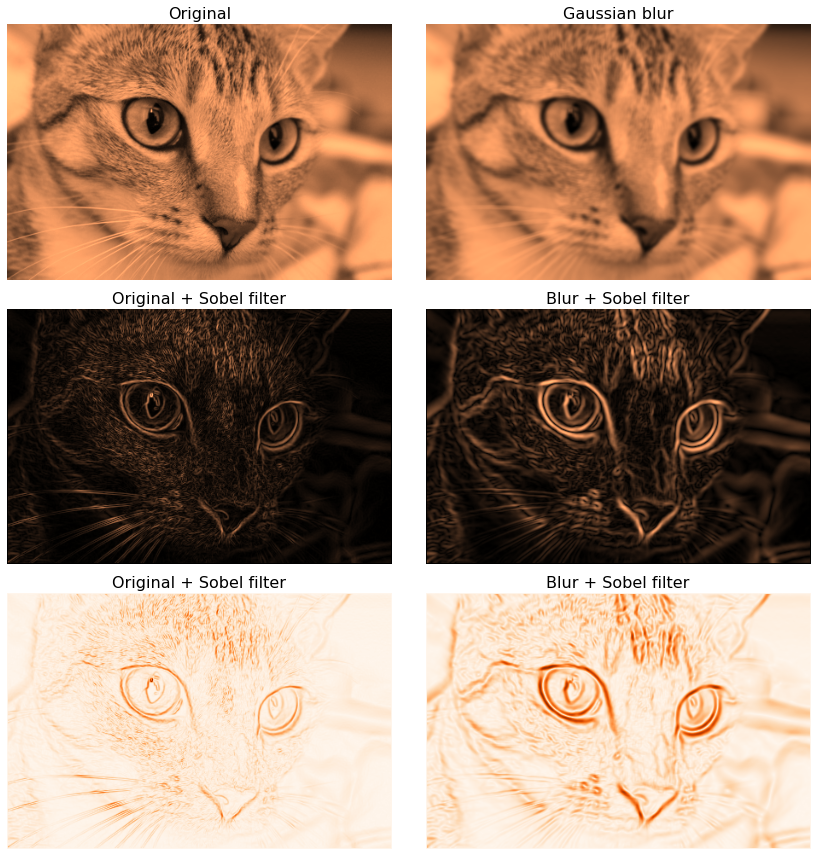

In [ ]:
from skimage.filters import sobel

# Apply filter and plot
# Note : applying Sobel filter to blurred image yields thicker edges
chelsea_sobel = sobel(chelsea_gray)
chelsea_blur_sobel = sobel(chelsea_gblur)

fig, ax = plt.subplots(nrows=3, ncols=2, sharex=True, sharey=True, figsize=(12,12))

ax[0,0].imshow(chelsea_gray, cmap='copper')
ax[0,0].set_title('Original', fontsize = 16)

ax[0,1].imshow(chelsea_gblur, cmap='copper')
ax[0,1].set_title('Gaussian blur', fontsize = 16)

ax[1,0].imshow(chelsea_sobel, cmap='copper')
ax[1,0].set_title('Original + Sobel filter', fontsize = 16)

ax[1,1].imshow(chelsea_blur_sobel, cmap='copper')
ax[1,1].set_title('Blur + Sobel filter', fontsize = 16)

# Plotted with a different color map 'Oranges' (roughly the reverse of copper)
ax[2,0].imshow(chelsea_sobel, cmap='Oranges')
ax[2,0].set_title('Original + Sobel filter', fontsize = 16)

ax[2,1].imshow(chelsea_blur_sobel, cmap='Oranges')
ax[2,1].set_title('Blur + Sobel filter', fontsize = 16)

for i in ax:
  for j in i:
    i,j.axis('off')

plt.tight_layout()
plt.show()

## Save image as .jpg

(-0.5, 450.5, 299.5, -0.5)

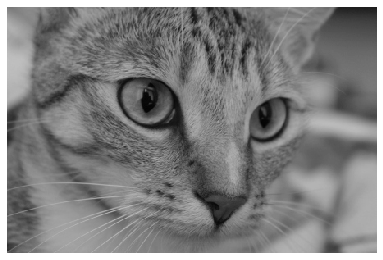

In [ ]:
# Save grayscale Chelsea
from skimage.io import imsave, imshow
imsave("chelsea_gray.jpeg", chelsea_gray)

imshow(chelsea_gray)
plt.axis('off')

# EXERCISE 2: semi-super resolution!

Take one image on your own (or one blurred image from somewhere) and apply the techniques we have seen in class to sharpen an image from a blurred one. You can also blur one image of your own as a start.

## Import image

I'm using my own image, taken with a smartphone in low light. The image was blurry due to movement while capturing the image; not due to deliberate manipulation of depth of field. 

In [ ]:
# Libraries & functionalities
import numpy as np
import skimage
import imageio
from scipy import ndimage

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

(<Figure size 864x648 with 2 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33d245cd30>,
       dtype=object))

Text(0.5, 1.0, 'RGB')

Text(0.5, 1.0, 'Grayscale')

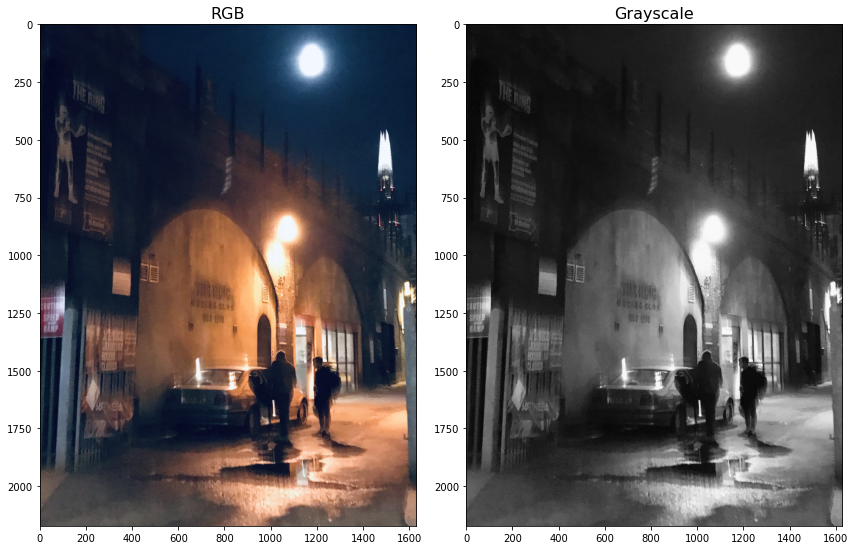

In [ ]:
# Import my own image + convert to grayscale
url = 'https://raw.githubusercontent.com/antiantono/bts-dsf-anti/main/data/night.jpg'
night_rgb = imageio.imread(url)

from skimage.color import rgb2gray
night = rgb2gray(night_rgb)

plt.subplots(1,2, figsize=(12,9))

plt.subplot(121)
plt.imshow(night_rgb)
plt.title('RGB', fontsize=16)

plt.subplot(122)
plt.imshow(night, cmap='gray')
plt.title('Grayscale', fontsize=16)

plt.tight_layout()

## Blurring

Add more blur because the original image is not so blurry; difficult to see the differences in visualization. Also, the blurrier image later yields clearer edge.

(<Figure size 1080x648 with 3 Axes>,
 array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f33d2602710>,
       dtype=object))

Text(0.5, 1.0, 'Original blurry')

(-0.5, 999.5, 999.5, -0.5)

Text(0.5, 1.0, 'Box blur')

(-0.5, 999.5, 999.5, -0.5)

Text(0.5, 1.0, 'Box + Gaussian blur')

(-0.5, 999.5, 999.5, -0.5)

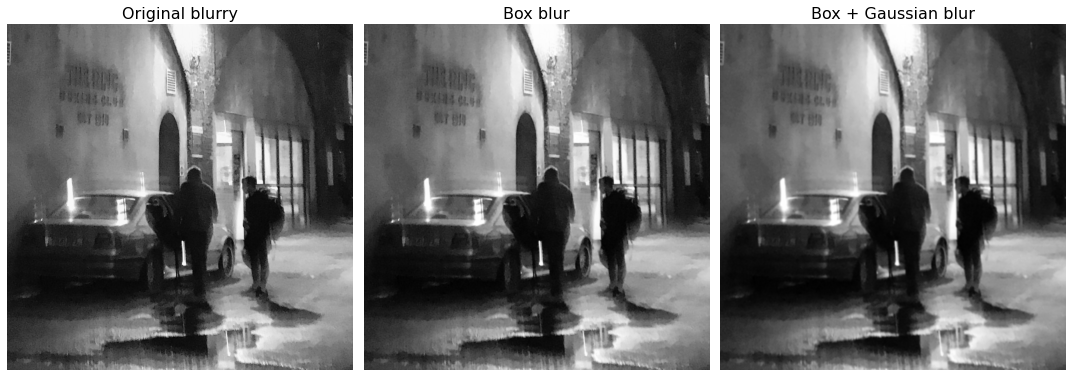

In [ ]:
# ADD MORE BLUR BEFORE SHARPENING

# Blurring kernels
k_box = np.array([[1,1,1],[1,1,1],[1,1,1]])        # box blur filter
k_gauss = fspecial_gauss(5,3)                      # Gaussian blur (function defined in exercise 1)

# Blur the original image 
night_blur1 = ndimage.convolve(night, k_box, mode='nearest', cval=1.0)
night_blur2 = ndimage.convolve(night_blur1, k_gauss, mode='nearest', cval=1.0)

# Plot
plt.subplots(1,3,figsize=(15,9))

plt.subplot(131)
plt.imshow(night[1000:2000,500:1500], cmap='gray')
plt.title('Original blurry', fontsize=16)
plt.axis('off')

plt.subplot(132)
plt.imshow(night_blur1[1000:2000,500:1500], cmap='gray')
plt.title('Box blur', fontsize=16)
plt.axis('off')

plt.subplot(133)
plt.imshow(night_blur2[1000:2000,500:1500], cmap='gray')
plt.title('Box + Gaussian blur', fontsize=16)
plt.axis('off')

plt.tight_layout()

## Sharpening

Two kernels used: low pass and high pass, applied to the image blurred further with box kernel.

High pass filter seems to work a bit better here (not sure if this is because the original image has large areas of low lights). 

(<Figure size 1080x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f33d2423898>)

Text(0.5, 1.0, 'Blur + low pass filter')

(-0.5, 1628.5, 999.5, -0.5)

Text(0.5, 1.0, 'Blur + high pass filter')

(-0.5, 1628.5, 999.5, -0.5)

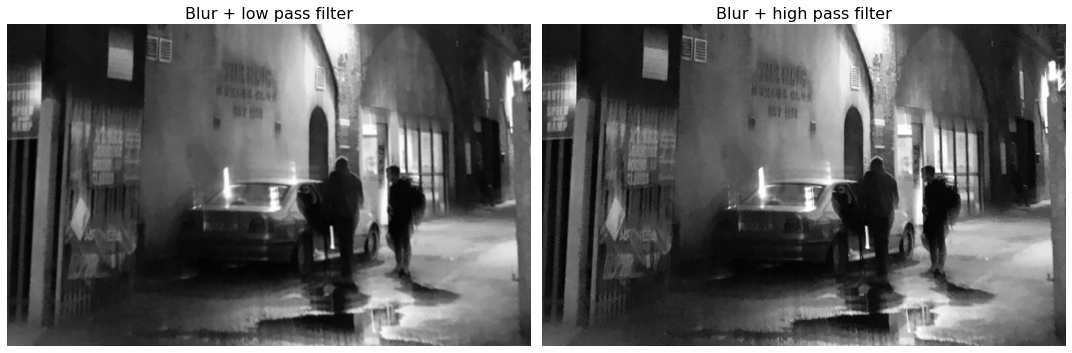

In [ ]:
# SHARPENING BLURRY IMAGE

# Filtering kernels
k_low  = np.array([[1,1,1],[1,-5,1],[1,1,1]])   # low pass filter
k_high = np.array([[1,1,1],[1,8,1],[1,1,1]])    # high pass filter

# Sharpen image 
night_low = ndimage.convolve(night_blur1, k_low, mode='nearest', cval=1.0)    
night_high = ndimage.convolve(night_blur1, k_high, mode='nearest', cval=1.0)   

# Plot (high pass filter works a bit better)
plt.subplots(figsize=(15,9))

plt.subplot(121)
plt.imshow(night_low[1000:2000], cmap='gray')
plt.title('Blur + low pass filter', fontsize=16)
plt.axis('off')

plt.subplot(122)
plt.imshow(night_high[1000:2000], cmap='gray')
plt.title('Blur + high pass filter', fontsize=16)
plt.axis('off')

plt.tight_layout()

## Edges

Extracting edges with different filters : 3x3 edge kernel, Roberts and Sobel filters. The blurriest image (box + Gaussian blur applied) was used to find thicker edges.

The edge kernel doesn't seem to work well; too much scattered light? However Roberts and Sobel find smoother edges, especially Roberts.

(<Figure size 1080x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f33d2317d68>)

Text(0.5, 1.0, 'Edge filter')

(-0.5, 1628.5, 2171.5, -0.5)

Text(0.5, 1.0, 'Roberts edge')

(-0.5, 1628.5, 2171.5, -0.5)

Text(0.5, 1.0, 'Sobel edge')

(-0.5, 1628.5, 2171.5, -0.5)

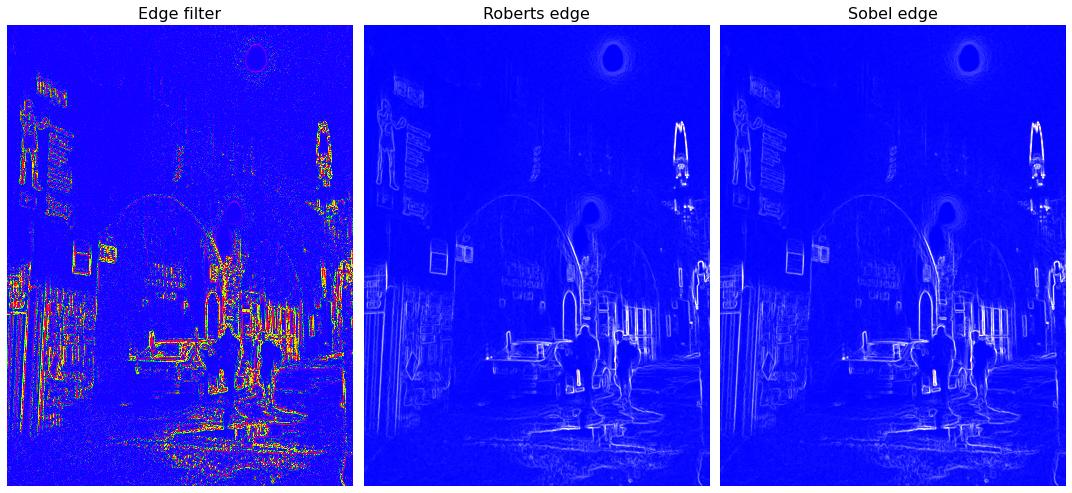

In [ ]:
# EXTRACTING EDGES 

# Filtering kernels
# Edge filter from : https://en.wikipedia.org/wiki/Kernel_(image_processing) 
k_edge = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])    
from skimage.filters import roberts, sobel

# Extract edges
night_edge = ndimage.convolve(night_blur2, k_edge, mode='nearest', cval=1.0)
night_rob = roberts(night_blur2)
night_sob = sobel(night_blur2)

# Plotting with different colormaps to show the edges
# https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
plt.subplots(figsize=(15,9))

plt.subplot(131)
plt.imshow(night_edge, cmap='prism')      # alternating colormap    
plt.title('Edge filter', fontsize=16)
plt.axis('off')

plt.subplot(132)
plt.imshow(night_rob, cmap='bwr')         # divergent colormap
plt.title('Roberts edge', fontsize=16)
plt.axis('off')

plt.subplot(133)
plt.imshow(night_sob, cmap='bwr')         # divergent colormap
plt.title('Sobel edge', fontsize=16)
plt.axis('off')

plt.tight_layout()

# EXERCISE 3: image segmentation
Take a picture with your phone or your camera of some objects that you want to count. (Beware: try to take high contrast images with a stable background, preferably dark over white or similar such as coins, chessboard, etc.).

Load the image with scikit image
Count the objects in the image using region based segmentation
Try to fix the image using opening/closing algorithms

## Import image

I'm using a photo of my blue-patterned coasters, placed on a black blanket. The original photo is a bit yellowish due to lighting.

In [ ]:
# Libraries & functionalities
import numpy as np
import imageio
import skimage
from scipy import ndimage as ndi

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

(<Figure size 864x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f33d23222e8>)

Text(0.5, 1.0, 'RGB')

(-0.5, 1631.5, 1223.5, -0.5)

Text(0.5, 1.0, 'Grayscale')

(-0.5, 1631.5, 1223.5, -0.5)

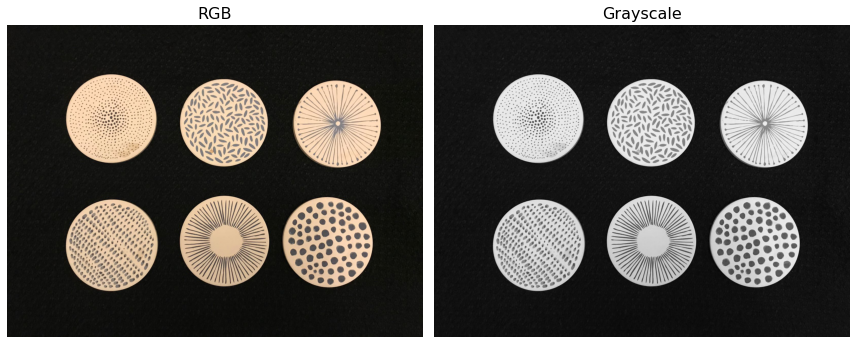

In [ ]:
# Import own image + convert to grayscale
url = 'https://raw.githubusercontent.com/antiantono/bts-dsf-anti/main/data/coasters.jpg'
coasters_rgb = imageio.imread(url)

from skimage.color import rgb2gray
coasters = rgb2gray(coasters_rgb)

plt.subplots(figsize=(12,9))

plt.subplot(121)
plt.imshow(coasters_rgb)
plt.title('RGB', fontsize=16)
plt.axis('off')

plt.subplot(122)
plt.imshow(coasters, cmap='gray')
plt.title('Grayscale', fontsize=16)
plt.axis('off')

plt.tight_layout()

## Marking the objects

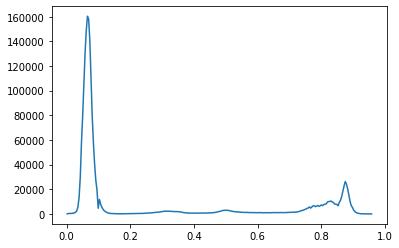

In [ ]:
# Check histogram
from skimage.exposure import histogram

hist, bin_centers = histogram(coasters)
plt.plot(bin_centers, hist)

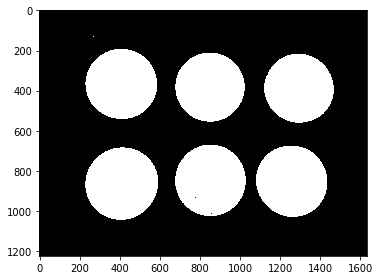

In [ ]:
# Simple marking to remove the pattern on the coasters 
from skimage.io import imshow
coasters_bool = coasters > .18
imshow(coasters_bool)

Detected 23 objects


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


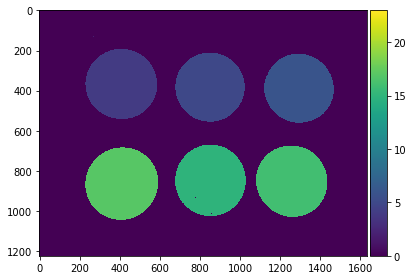

In [ ]:
# Check number of objects : still too many!
labeled_obj, n_labels = ndi.label(coasters_bool)
print("Detected", n_labels, "objects")
imshow(labeled_obj)

## Clean out imperfection

In [ ]:
# Check distribution of the labeled objects
sizes = np.bincount(labeled_obj.ravel())
sizes

array([1413375,       1,      10,       2,   98015,   93085,   93248,
            10,       1,       1,       2,       2,      10,       5,
             1,   98166,   99043,  102581,       2,       1,       1,
             4,       1,       1])

Detected 6 objects


/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


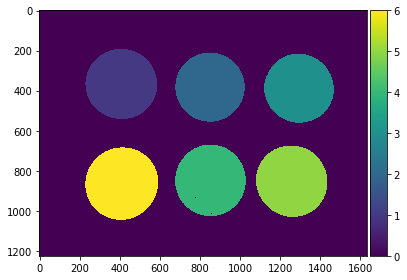

In [ ]:
# Mask large counts 
mask = sizes > 10
mask[0] = 0

# Apply the mask to the labeled objects
coasters_cleaned = mask[labeled_obj]

# Check counts again - now correct!
new_labeled_obj, new_n_labels = ndi.label(coasters_cleaned)
print("Detected", new_n_labels, "objects")
imshow(new_labeled_obj)